# Simple Statistics

## Import Data

In [239]:
# Imports 
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mplsoccer import Pitch, Sbopen, VerticalPitch

/Users/g4din/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [158]:
# Import the csv files that are in the csv folder and save them into dataframes
damallsvenskan2018_df = pd.read_csv('csv/damallsvenskan2018.csv')
damallsvenskan2019_df = pd.read_csv('csv/damallsvenskan2019.csv')
damallsvenskan2020_df = pd.read_csv('csv/damallsvenskan2020.csv')
damallsvenskan2021_df = pd.read_csv('csv/damallsvenskan2021.csv')
damallsvenskan2022_df = pd.read_csv('csv/damallsvenskan2022.csv')
damallsvenskan_all_df = pd.read_csv('csv/damallsvenskan_all.csv')

allsvenskan2018_df = pd.read_csv('csv/allsvenskan2018.csv')
allsvenskan2019_df = pd.read_csv('csv/allsvenskan2019.csv')
allsvenskan2020_df = pd.read_csv('csv/allsvenskan2020.csv')
allsvenskan2021_df = pd.read_csv('csv/allsvenskan2021.csv')
allsvenskan2022_df = pd.read_csv('csv/allsvenskan2022.csv')
allsvenskan_all_df = pd.read_csv('csv/allsvenskan_all.csv')

## Simple Statistics

### Amount of passes

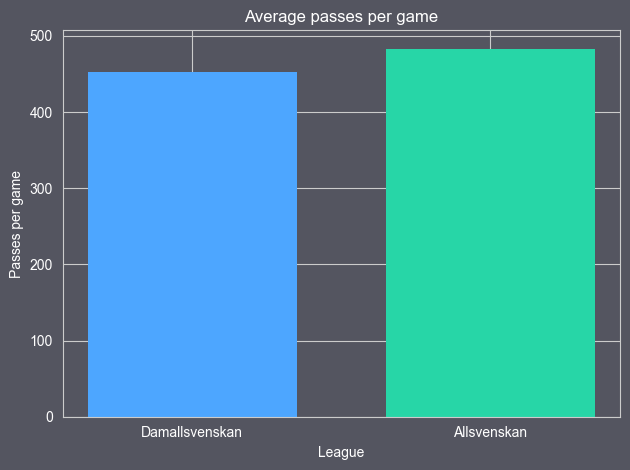

In [159]:
# Count the number of passes in total for all teams for each season
pass_count_damallsvenskan =  damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Pass accurate'].shape[0] + allsvenskan_all_df[allsvenskan_all_df['action'] == 'Pass inaccurate'].shape[0]

# Since the women play less games each season we need to normalize the data by dividing the total number of passes by the number of games played
damallsvenskan_factor = 264 + 264 + 264 + 264 + 364
allsvenskan_factor = 480 + 480 + 480 + 480 + 480
pass_count_damallsvenskan = pass_count_damallsvenskan / damallsvenskan_factor
pass_count_allsvenskan = pass_count_allsvenskan / allsvenskan_factor

# Plot the data
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], pass_count_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], pass_count_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Passes per game', color='white')  # Set the text color for the y-axis label to white
plt.title('Average passes per game', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the y-axis ticks to white
plt.tight_layout()
plt.show()

### Passing accuracy

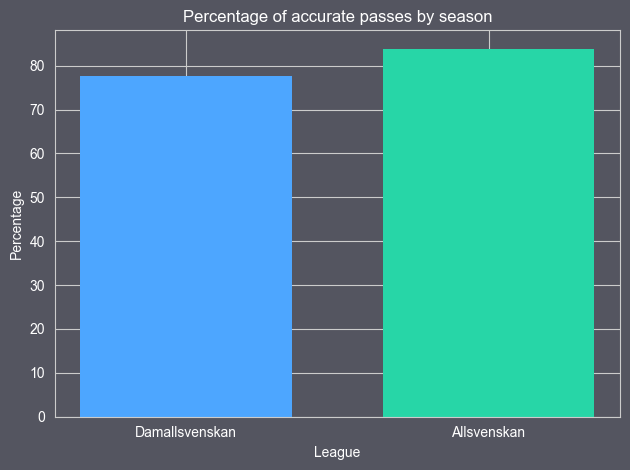

In [160]:
# Count the number of accurate passes and inaccurate passes for all teams for each season

pass_count_damallsvenskan = damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Pass accurate'].shape[0] + allsvenskan_all_df[allsvenskan_all_df['action'] == 'Pass inaccurate'].shape[0]
acc_pass_count_damallsvenskan =  damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Pass accurate'].shape[0]
acc_pass_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Pass accurate'].shape[0]


# Calculate the percentage for each season
percentage_damallsvenskan = acc_pass_count_damallsvenskan / pass_count_damallsvenskan * 100
percentage_allsvenskan = acc_pass_count_allsvenskan / pass_count_allsvenskan * 100

# Plot the data
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], percentage_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], percentage_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Percentage', color='white')  # Set the text color for the y-axis label to white
plt.title('Percentage of accurate passes by season', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the y-axis ticks to white
plt.tight_layout()
plt.show()

### Goal conversion rate

In [161]:
# Count the number of shots in total for all teams for each season
shot_count_damallsvenskan =  damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Shot'].shape[0]
# Count all the times that a row has the event 'Shot' and the row beneath it has the event 'Goal'
goal_count_damallsvenskan = 0
for i in range(len(damallsvenskan_all_df) - 1):
    if damallsvenskan_all_df.iloc[i]['action'] == 'Shot' and damallsvenskan_all_df.iloc[i+1]['action'] == 'Goal':
        goal_count_damallsvenskan += 1
# Goal conversion rate
goal_conversion_rate_damallsvenskan = goal_count_damallsvenskan / shot_count_damallsvenskan * 100

# Same with Allsvenskan
shot_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Shot'].shape[0]
goal_count_allsvenskan = 0
for i in range(len(allsvenskan_all_df) - 1):
    if allsvenskan_all_df.iloc[i]['action'] == 'Shot' and allsvenskan_all_df.iloc[i+1]['action'] == 'Goal':
        goal_count_allsvenskan += 1
goal_conversion_rate_allsvenskan = goal_count_allsvenskan / shot_count_allsvenskan * 100

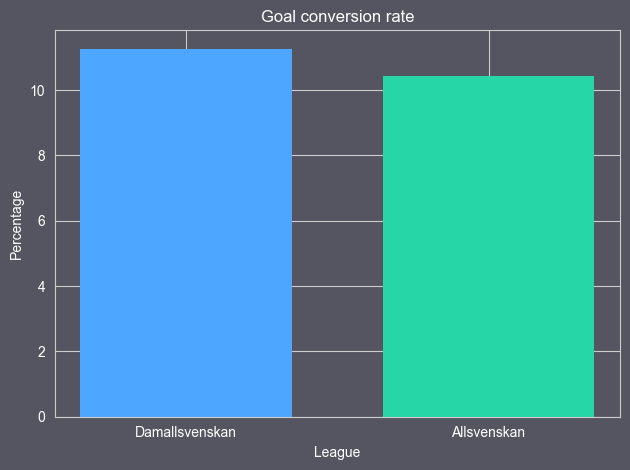

In [162]:
# Plot the data
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], goal_conversion_rate_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], goal_conversion_rate_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Percentage', color='white')  # Set the text color for the y-axis label to white
plt.title('Goal conversion rate', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the y-axis ticks to white
plt.tight_layout()
plt.show()

### Goal Placement

In [163]:
# For every shot on target, there is a coordinate to where the shot hit the goal.
# I want to count the number of shots that hit the goal in each of the 9 zones of the goal.
# After that i want to calcuate the percentage of the shots for each zone that was a goal.

shot_placement_dict = {'zone1': 0, 'zone2': 0, 'zone3': 0, 'zone4': 0, 'zone5': 0, 'zone6': 0, 'zone7': 0, 'zone8': 0, 'zone9': 0}

for i in range(len(damallsvenskan_all_df) - 1):
    if damallsvenskan_all_df.iloc[i]['action'] == 'Shot' and damallsvenskan_all_df.iloc[i+1]['action'] != 'Goal':
        if damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Left':
            shot_placement_dict['zone1'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Center':
            shot_placement_dict['zone2'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Right':
            shot_placement_dict['zone3'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Left':
            shot_placement_dict['zone4'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Center':
            shot_placement_dict['zone5'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Right':
            shot_placement_dict['zone6'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Left':
            shot_placement_dict['zone7'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Center':
            shot_placement_dict['zone8'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Right':
            shot_placement_dict['zone9'] += 1

goal_shot_placement = {'zone1': 0, 'zone2': 0, 'zone3': 0, 'zone4': 0, 'zone5': 0, 'zone6': 0, 'zone7': 0, 'zone8': 0, 'zone9': 0}

for i in range(len(damallsvenskan_all_df) - 1):
    if damallsvenskan_all_df.iloc[i]['action'] == 'Shot' and damallsvenskan_all_df.iloc[i+1]['action'] == 'Goal':
        if damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Left':
            goal_shot_placement['zone1'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Center':
            goal_shot_placement['zone2'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Right':
            goal_shot_placement['zone3'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Left':
            goal_shot_placement['zone4'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Center':
            goal_shot_placement['zone5'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Right':
            goal_shot_placement['zone6'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Left':
            goal_shot_placement['zone7'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Center':
            goal_shot_placement['zone8'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Right':
            goal_shot_placement['zone9'] += 1

# Calculate the percentage of goals for each zone
goal_percentage_zone1 = goal_shot_placement['zone1'] / (shot_placement_dict['zone1'] + goal_shot_placement['zone1']) * 100
goal_percentage_zone2 = goal_shot_placement['zone2'] / (shot_placement_dict['zone2'] + goal_shot_placement['zone2']) * 100
goal_percentage_zone3 = goal_shot_placement['zone3'] / (shot_placement_dict['zone3'] + goal_shot_placement['zone3']) * 100
goal_percentage_zone4 = goal_shot_placement['zone4'] / (shot_placement_dict['zone4'] + goal_shot_placement['zone4']) * 100
goal_percentage_zone5 = goal_shot_placement['zone5'] / (shot_placement_dict['zone5'] + goal_shot_placement['zone5']) * 100
goal_percentage_zone6 = goal_shot_placement['zone6'] / (shot_placement_dict['zone6'] + goal_shot_placement['zone6']) * 100
goal_percentage_zone7 = goal_shot_placement['zone7'] / (shot_placement_dict['zone7'] + goal_shot_placement['zone7']) * 100
goal_percentage_zone8 = goal_shot_placement['zone8'] / (shot_placement_dict['zone8'] + goal_shot_placement['zone8']) * 100
goal_percentage_zone9 = goal_shot_placement['zone9'] / (shot_placement_dict['zone9'] + goal_shot_placement['zone9']) * 100

# Data to plot
n_groups = 9
damallsvenskan = (goal_percentage_zone1, goal_percentage_zone2, goal_percentage_zone3, goal_percentage_zone4, goal_percentage_zone5, goal_percentage_zone6, goal_percentage_zone7, goal_percentage_zone8, goal_percentage_zone9)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import io

# Load the image of the goal
goal_image_path = 'img/goal.png'
goal_image = Image.open(goal_image_path)
goal_width, goal_height = goal_image.size

# Data
heatmap_data = np.array(damallsvenskan).reshape(3, 3)

# Set up the figure size to match the aspect ratio of the goal image
fig, ax = plt.subplots(figsize=(goal_width/100, goal_height/100), dpi=100)

# Create the heatmap
cax = ax.imshow(heatmap_data, cmap='Reds', interpolation='nearest', alpha=0.6, vmin=0, vmax=70)  # Set the vmin and vmax to define the scale

# Annotate each cell with the numeric value using white text
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        ax.text(j, i, '{:.1f}%'.format(heatmap_data[i, j]), ha='center', va='center', color='w', size = 25)

# Turn off the axes
ax.axis('off')

# Save the heatmap to a temporary buffer
heatmap_buffer = io.BytesIO()
plt.savefig(heatmap_buffer, format='png', transparent=True)
heatmap_buffer.seek(0)

# Load this heatmap into PIL
heatmap_image = Image.open(heatmap_buffer)

# Resize heatmap to match the specified size
heatmap_image = heatmap_image.resize((3123, 681), Image.LANCZOS)

# Define the position where you want to paste the heatmap on the goal image
heatmap_position = (-652, 202) 

# Overlay the heatmap on the goal image
goal_with_heatmap = goal_image.copy()
goal_with_heatmap.paste(heatmap_image, heatmap_position, heatmap_image.split()[3])  # Use the alpha channel as the mask

# Save or display the combined image
goal_with_heatmap_path = 'img/heatmap.png'
goal_with_heatmap.save(goal_with_heatmap_path)
goal_with_heatmap.show()


### Shots

In [245]:
x_shot_coordinates = []
y_shot_coordinates = []
x_goal_coordinates = []
y_goal_coordinates = []

for i in range(len(damallsvenskan_all_df) - 1):
    if damallsvenskan_all_df.iloc[i]['action'] == 'Shot' and damallsvenskan_all_df.iloc[i+1]['action'] != 'Goal':
        x_shot_coordinates.append(damallsvenskan_all_df.iloc[i]['xpos'])
        y_shot_coordinates.append(damallsvenskan_all_df.iloc[i]['ypos'])

for i in range(len(damallsvenskan_all_df) - 1):
    if damallsvenskan_all_df.iloc[i]['action'] == 'Shot' and damallsvenskan_all_df.iloc[i+1]['action'] == 'Goal':
        x_goal_coordinates.append(damallsvenskan_all_df.iloc[i]['xpos'])
        y_goal_coordinates.append(damallsvenskan_all_df.iloc[i]['ypos'])

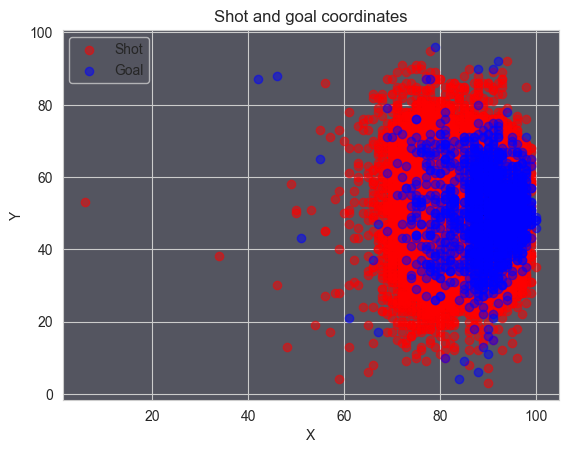

In [258]:
# scatter plot
plt.scatter(x_shot_coordinates, y_shot_coordinates, color='red', alpha=0.5, label='Shot')
plt.scatter(x_goal_coordinates, y_goal_coordinates, color='blue', alpha=0.5, label='Goal')
plt.legend(loc='upper left')
plt.title('Shot and goal coordinates')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
